In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import point, Polygon
%matplotlib inline

In [2]:
suplementary_data= pd.read_csv("https://raw.githubusercontent.com/RamiKrispin/coronavirus/master/csv/coronavirus.csv")
suplementary_data

C:\Users\HP\AppData\Local\Temp\ipykernel_4216\3406211343.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  suplementary_data= pd.read_csv("https://raw.githubusercontent.com/RamiKrispin/coronavirus/master/csv/coronavirus.csv")


,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code
0,2020-01-22,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN
1,2020-01-23,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN
2,2020-01-24,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN
3,2020-01-25,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN
4,2020-01-26,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919303,2022-12-31,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF
919304,2023-01-01,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF
919305,2023-01-02,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF
919306,2023-01-03,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF


In [3]:
confirmed =pd.read_csv("time_series_covid_19_confirmed.csv")
deaths= pd.read_csv("time_series_covid_19_deaths.csv")
recovered = pd.read_csv("time_series_covid_19_recovered.csv")

In [4]:
def melt_data(case_type, rename):
    df = case_type
    melted_df= df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
    melted_df.rename(columns= {"variable":"Date", "value":rename}, inplace= True)
    return melted_df

In [5]:
confirmed = melt_data(confirmed, "Confirmed")
deaths = melt_data(deaths, "Deaths")
recovered = melt_data(recovered, "Recovered")

In [6]:
print(confirmed.shape)
print(deaths.shape)
print(recovered.shape)

(136344, 6)
(136344, 6)
(128934, 6)


**Merge or Join**

- You can do a merge on 
- Or you can join

but since there was were some null values in recovered lets use join for ease

In [7]:
final_df= confirmed.join(deaths["Deaths"]).join(recovered["Recovered"])

In [8]:
final_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0,0.0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0,0.0


In [9]:
## save the dataset
final_df.to_csv("Updated_dataset.csv")

In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136344 entries, 0 to 136343
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  42484 non-null   object 
 1   Country/Region  136344 non-null  object 
 2   Lat             135356 non-null  float64
 3   Long            135356 non-null  float64
 4   Date            136344 non-null  object 
 5   Confirmed       136344 non-null  int64  
 6   Deaths          136344 non-null  int64  
 7   Recovered       128934 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 8.3+ MB


In [11]:
final_df["Date"] = pd.to_datetime(final_df["Date"], format="%m/%d/%y")

**From the Dataset we should formulate our own analysis**
- What is the number of deaths, confirmed cases and recovered people per day
- Country with the highest number of cases
- Top countries affected
- Cases per day
- Distribution per continent
- Cases Per country

In [12]:
suplementary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919308 entries, 0 to 919307
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            919308 non-null  object 
 1   province        277303 non-null  object 
 2   country         919308 non-null  object 
 3   lat             913913 non-null  float64
 4   long            913913 non-null  float64
 5   type            919308 non-null  object 
 6   cases           919308 non-null  int64  
 7   uid             884780 non-null  float64
 8   iso2            871832 non-null  object 
 9   iso3            875069 non-null  object 
 10  code3           875069 non-null  float64
 11  combined_key    884780 non-null  object 
 12  population      867516 non-null  float64
 13  continent_name  875069 non-null  object 
 14  continent_code  718614 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 105.2+ MB


In [13]:
suplementary_data.isna().sum()

date                   0
province          642005
country                0
lat                 5395
long                5395
type                   0
cases                  0
uid                34528
iso2               47476
iso3               44239
code3              44239
combined_key       34528
population         51792
continent_name     44239
continent_code    200694
dtype: int64

In [14]:
suplementary_data.describe()

,lat,long,cases,uid,code3,population
count,913913.000000,913913.000000,9.193080e+05,884780.000000,875069.000000,8.675160e+05
mean,19.267325,23.840034,7.284221e+02,2840.842683,375.041924,2.878880e+07
std,25.754541,77.105193,4.179672e+04,5255.392173,254.020151,9.309899e+07
min,-71.949900,-178.116500,-3.097475e+07,4.000000,4.000000,8.090000e+02
25%,3.933900,-15.310100,0.000000e+00,267.500000,156.000000,7.716120e+05
50%,20.593684,21.745300,0.000000e+00,531.000000,336.000000,6.880000e+06
75%,40.143100,90.433600,1.200000e+01,804.000000,598.000000,2.913681e+07
max,71.706900,178.065000,1.355241e+06,15699.000000,894.000000,1.380004e+09


In [15]:
suplementary_data["data"]= pd.to_datetime(suplementary_data["date"], format="%Y-%m-%d")

In [16]:
df_per_day= suplementary_data.groupby(["date","type"])["cases"].max().unstack()

In [17]:
pd.options.display.float_format = '{:,.2f}'.format

In [18]:
df_per_day.describe()

type,confirmed,death,recovery
count,"1,079.00","1,079.00","1,079.00"
mean,"141,361.66","2,179.65","36,454.02"
std,"142,514.78","24,639.59","75,144.52"
min,17.00,1.00,0.00
25%,"59,904.50",594.00,0.00
50%,"97,894.00","1,167.00",356.00
75%,"184,373.50","1,995.00","52,333.50"
max,"1,355,241.00","809,919.00","1,123,456.00"


In [19]:
# Maximum number of cases per day and the minimum number of cases per day
print(df_per_day["confirmed"].max())
print(df_per_day["confirmed"].min())

1355241
17


In [20]:
# Date of the Maximum day

# Convert index column to datetime
df_per_day.index = pd.to_datetime(df_per_day.index)
print(df_per_day["confirmed"].idxmax().day_name())
print(df_per_day["confirmed"].idxmax().month_name())
print(df_per_day["confirmed"].idxmax().year)

Monday
January
2022


In [21]:
# Number of case per country 
country= suplementary_data.groupby(["country","type"])["cases"].max().unstack()

In [22]:
print(country["confirmed"].idxmax(), "had the most covid 19 confirmed cases with", country["confirmed"].max())

US had the most covid 19 confirmed cases with 1355241


In [23]:
# Number of affected countries 
country.confirmed.count()

201

In [24]:
country.sort_values(by=['confirmed', 'death', 'recovery'], ascending=False, inplace=True)

In [25]:
country.head(10)

type,confirmed,death,recovery
country,,,
US,1355241,4389,150267
United Kingdom,847371,1490,1712
Turkey,823225,394,1123456
"Korea, South",621317,470,3129
France,501635,1436,13755
Germany,484345,1244,44517
Vietnam,454212,804,7674
India,414188,7374,422436
Netherlands,380388,809919,1285


C:\Users\HP\AppData\Local\Temp\ipykernel_4216\2954115187.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


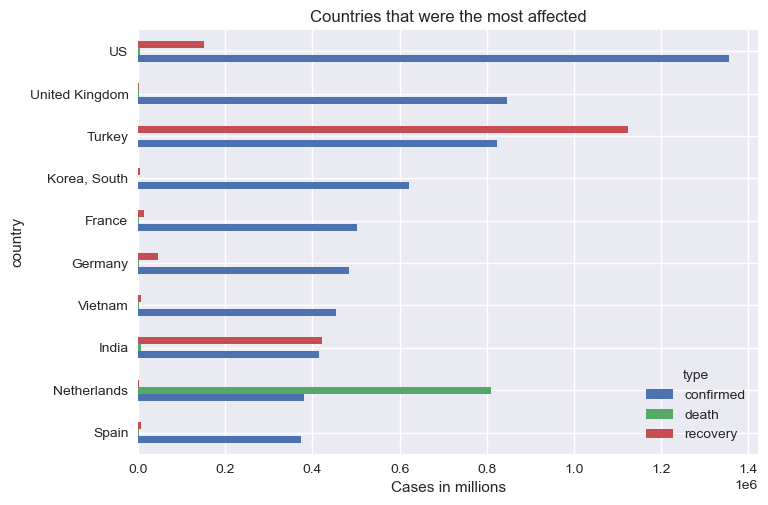

In [53]:
plt.style.use("seaborn")
ax= country.head(10)[::-1].plot.barh()

plt.title("Countries that were the most affected")
plt.xlabel("Cases in millions")
# for container in ax.containers:
#     ax.bar_label(container)

plt.savefig("Countries that were the most affected.png")
plt.show()

**GeoSpatial with Suplementary data**

In [27]:
geo1 =gpd.GeoDataFrame(suplementary_data, geometry=gpd.points_from_xy(suplementary_data["long"], suplementary_data["lat"]))

<Axes: >

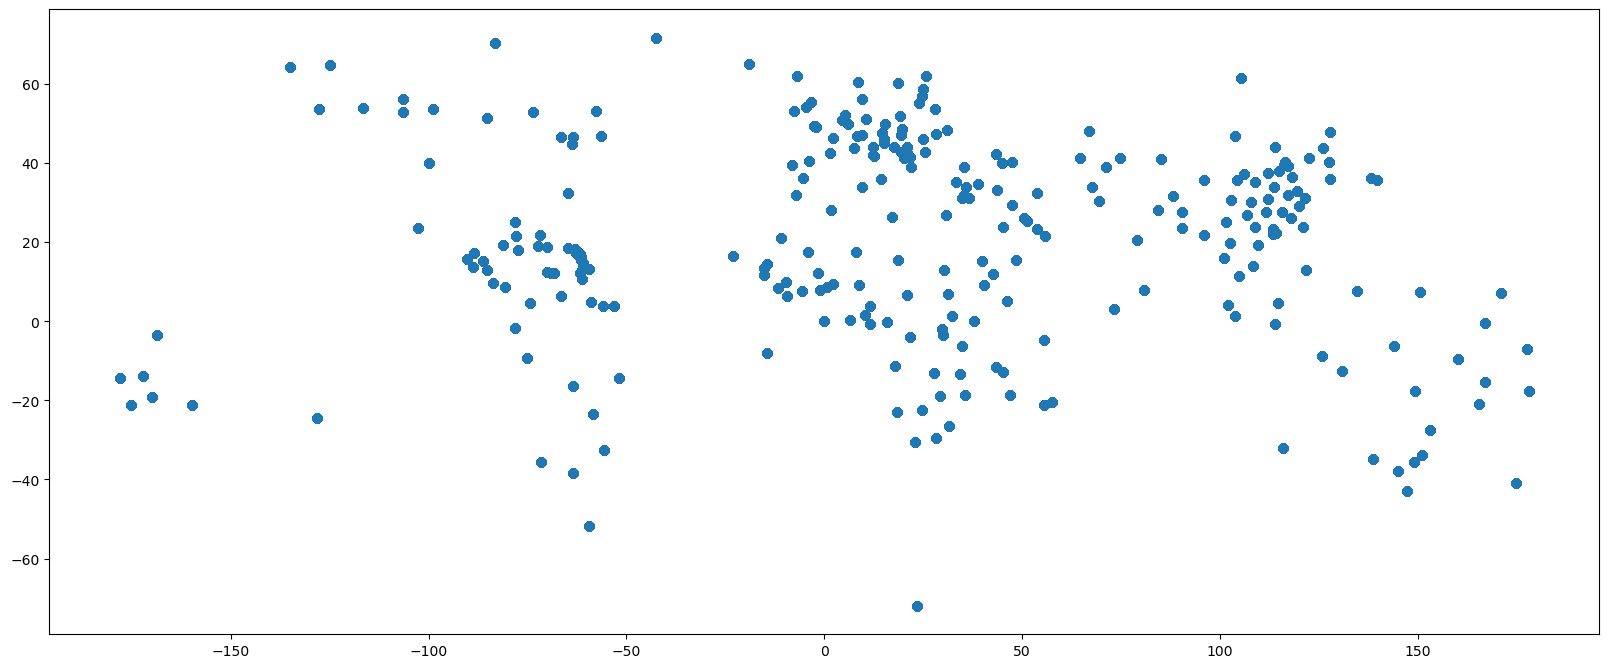

In [28]:
geo1.plot(figsize=(20,10))

In [29]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world["continent"].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [30]:
filt= world["continent"] == "Africa"

africa= world.loc[filt]

In [31]:
filt= geo1['continent_name'] == "Africa"

Africa= geo1.loc[filt]

In [32]:
Africa

,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code,data,geometry
50713,2020-01-22,Mayotte,France,-12.83,45.17,confirmed,0,175.00,YT,MYT,175.00,"Mayotte, France","272,813.00",Africa,AF,2020-01-22,POINT (45.16624 -12.82750)
50714,2020-01-23,Mayotte,France,-12.83,45.17,confirmed,0,175.00,YT,MYT,175.00,"Mayotte, France","272,813.00",Africa,AF,2020-01-23,POINT (45.16624 -12.82750)
50715,2020-01-24,Mayotte,France,-12.83,45.17,confirmed,0,175.00,YT,MYT,175.00,"Mayotte, France","272,813.00",Africa,AF,2020-01-24,POINT (45.16624 -12.82750)
50716,2020-01-25,Mayotte,France,-12.83,45.17,confirmed,0,175.00,YT,MYT,175.00,"Mayotte, France","272,813.00",Africa,AF,2020-01-25,POINT (45.16624 -12.82750)
50717,2020-01-26,Mayotte,France,-12.83,45.17,confirmed,0,175.00,YT,MYT,175.00,"Mayotte, France","272,813.00",Africa,AF,2020-01-26,POINT (45.16624 -12.82750)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919303,2022-12-31,NaN,Zimbabwe,-19.02,29.15,recovery,0,716.00,ZW,ZWE,716.00,Zimbabwe,"14,862,927.00",Africa,AF,2022-12-31,POINT (29.15486 -19.01544)
919304,2023-01-01,NaN,Zimbabwe,-19.02,29.15,recovery,0,716.00,ZW,ZWE,716.00,Zimbabwe,"14,862,927.00",Africa,AF,2023-01-01,POINT (29.15486 -19.01544)
919305,2023-01-02,NaN,Zimbabwe,-19.02,29.15,recovery,0,716.00,ZW,ZWE,716.00,Zimbabwe,"14,862,927.00",Africa,AF,2023-01-02,POINT (29.15486 -19.01544)
919306,2023-01-03,NaN,Zimbabwe,-19.02,29.15,recovery,0,716.00,ZW,ZWE,716.00,Zimbabwe,"14,862,927.00",Africa,AF,2023-01-03,POINT (29.15486 -19.01544)


(-27.0714976, 61.5818496, -38.42762439346823, 40.95845245011106)

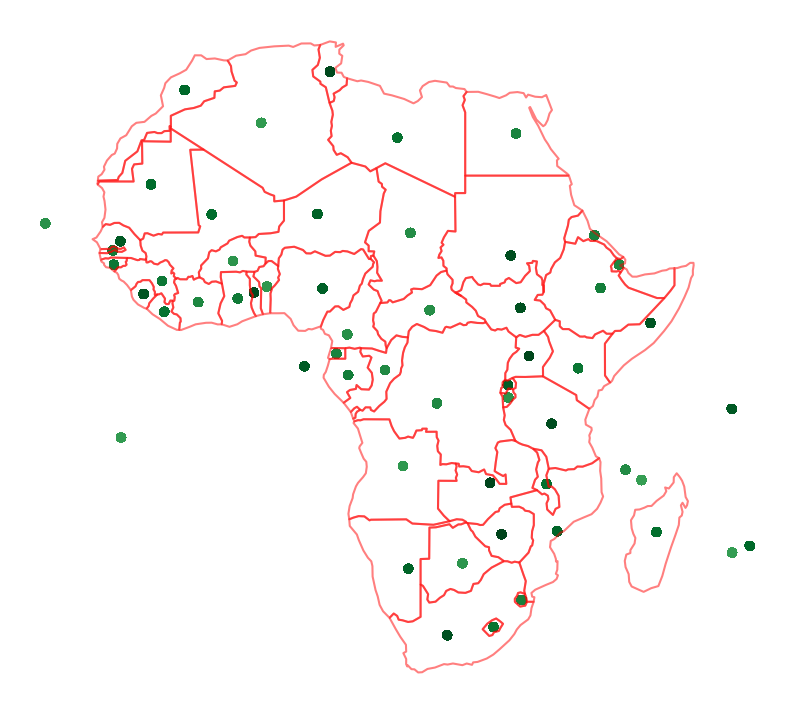

In [33]:
fig, ax = plt.subplots(figsize= (10,10))
Africa.plot(cmap="Greens",ax=ax)
africa.geometry.boundary.plot(color="red", edgecolor="k", alpha=0.5, ax=ax)
ax.axis("off")

In [34]:
geo1.set_index("date", inplace= True)

In [35]:
k =geo1[["continent_name","type","cases"]]

In [36]:
k.index = pd.to_datetime(k.index)
cases =k.groupby(["continent_name", "type"])["cases"].max().unstack()

In [37]:
cases.sort_values(by=['confirmed', 'death', 'recovery'], ascending=True, inplace=True )

C:\Users\HP\AppData\Local\Temp\ipykernel_4216\874329488.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


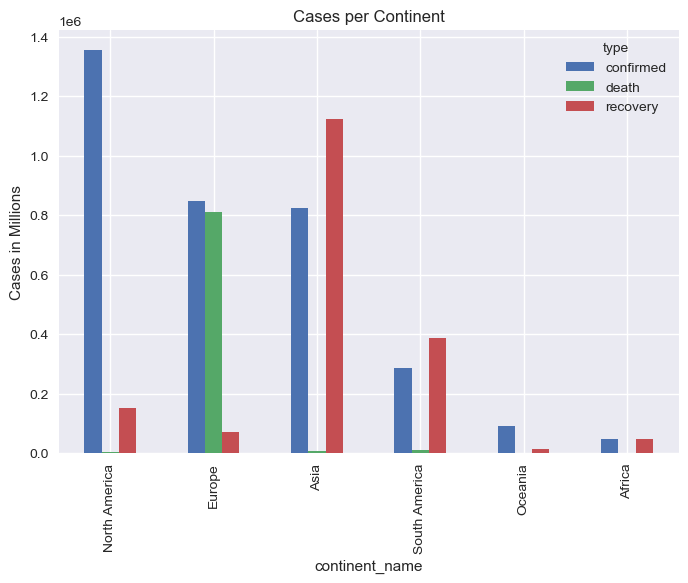

In [54]:
plt.style.use("seaborn")
cases[::-1].plot.bar()
plt.title("Cases per Continent")
plt.ylabel("Cases in Millions")

plt.savefig("Cases per Continent.png")
plt.show()

In [39]:
worldly_cases= k.groupby([k.index ,"type"])["cases"].max().unstack()

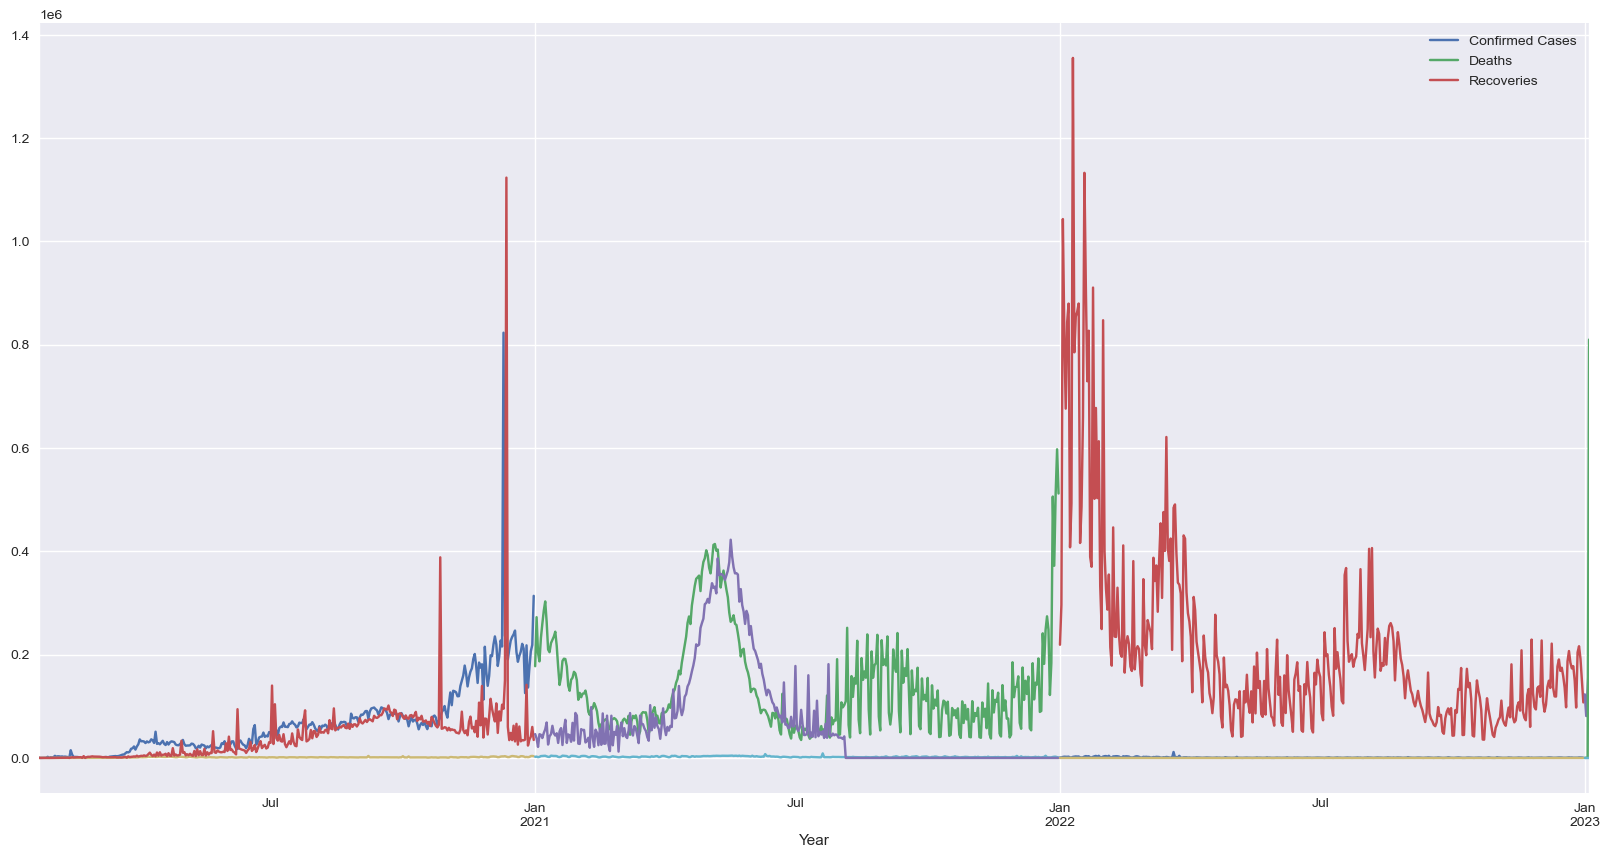

In [40]:
worldly_cases[['confirmed', 'death', 'recovery']].resample("Y").plot(figsize= (20,10))

# add legend
plt.legend(['Confirmed Cases', 'Deaths', 'Recoveries'])

# set x-label
plt.xlabel('Year')

# show plot
plt.show()

**GeoSpatial With LMS dataset**

In [41]:
## Convert Data to GeoDataframe
## ALWAYS START WITH THE LONGITUDE AND LATITUDE
gd01 = gpd.GeoDataFrame(final_df, geometry= gpd.points_from_xy(final_df["Long"], final_df["Lat"]))

<Axes: >

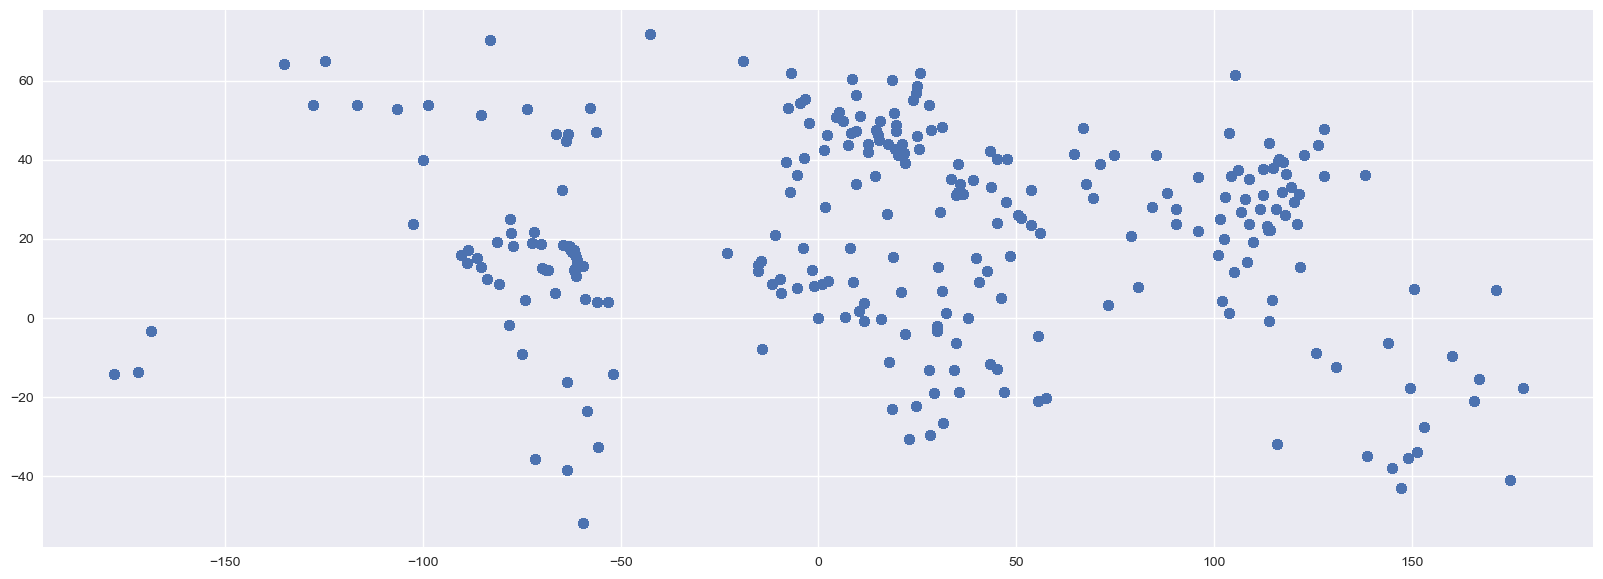

In [42]:
# We want to see the distribution
gd01.plot(figsize= (20,30))

<Axes: >

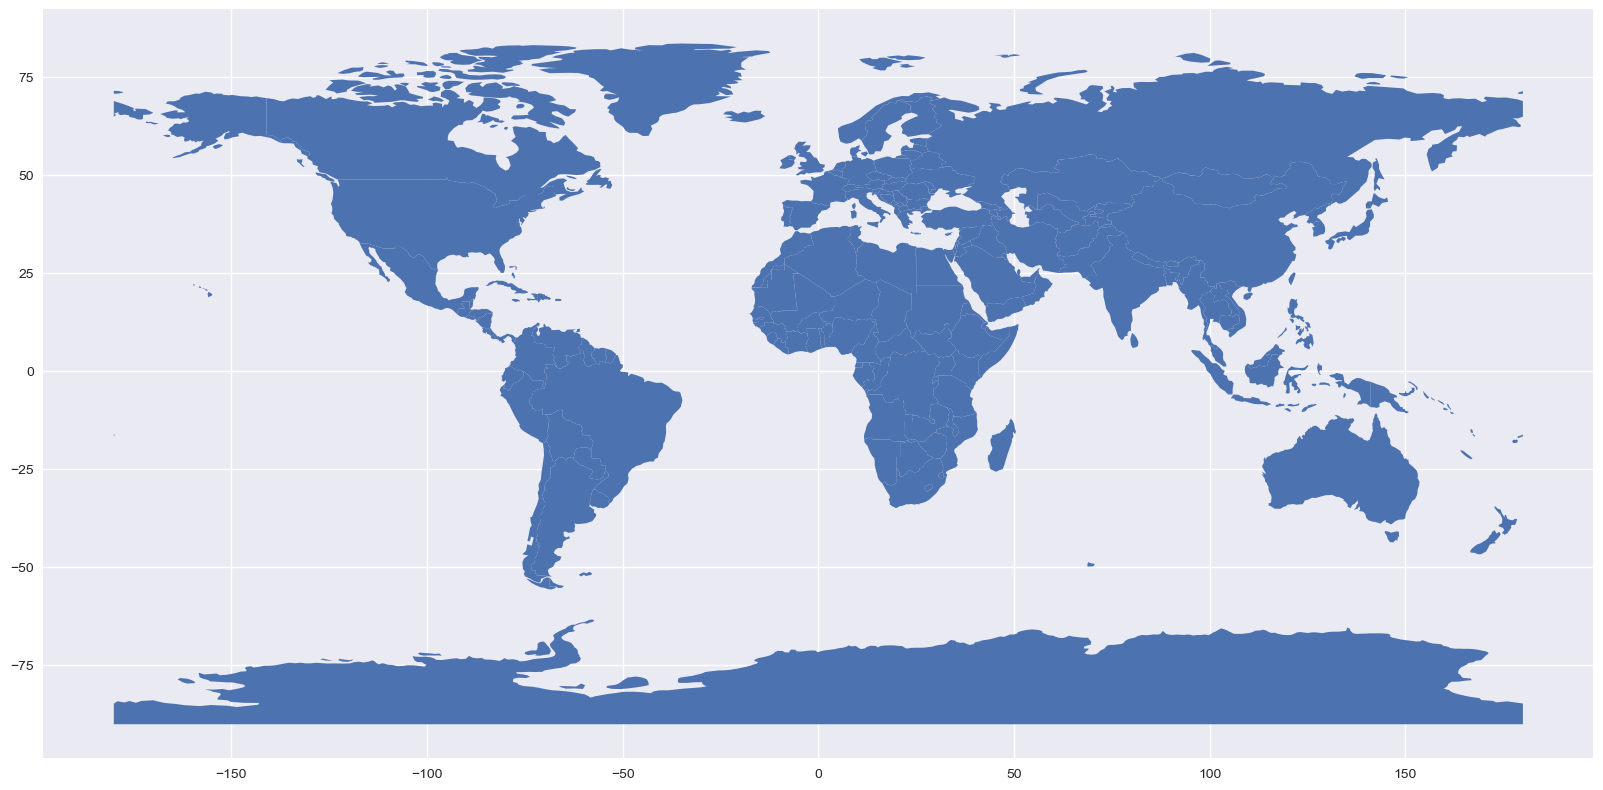

In [43]:
## MAP PLOT OF THE WORLD
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(figsize= (20,30))

In [ ]:
# OVERLAPPING WITH OUR DATA
fig, ax = plt.subplots(figsize= (20,10))
gd01.plot(cmap="Greens",ax=ax)
world.geometry.boundary.plot(color="blue", edgecolor="k", alpha=0.5, ax=ax)
ax.axis("off")

plt.savefig("Global cases.png")

In [45]:
# suplementary_data.to_csv("covid_world_data.csv")

In [46]:
country1= suplementary_data.groupby("country")["cases"].sum()

In [47]:
country1

country
Afghanistan             215565
Albania                 337414
Algeria                 278117
Andorra                  47916
Angola                  107025
                         ...  
West Bank and Gaza      708936
Winter Olympics 2022       535
Yemen                    14104
Zambia                  338910
Zimbabwe                265618
Name: cases, Length: 201, dtype: int64

In [48]:
country1.sort_values(ascending=False, inplace=True)

In [49]:
country1

country
US                      102139267
India                    45211253
France                   39738157
Germany                  37637704
Brazil                   37117549
                          ...    
Winter Olympics 2022          535
Holy See                       29
Antarctica                     11
MS Zaandam                     11
Korea, North                    7
Name: cases, Length: 201, dtype: int64

In [50]:
merged = world.merge(country1, left_on='name', right_index=True)

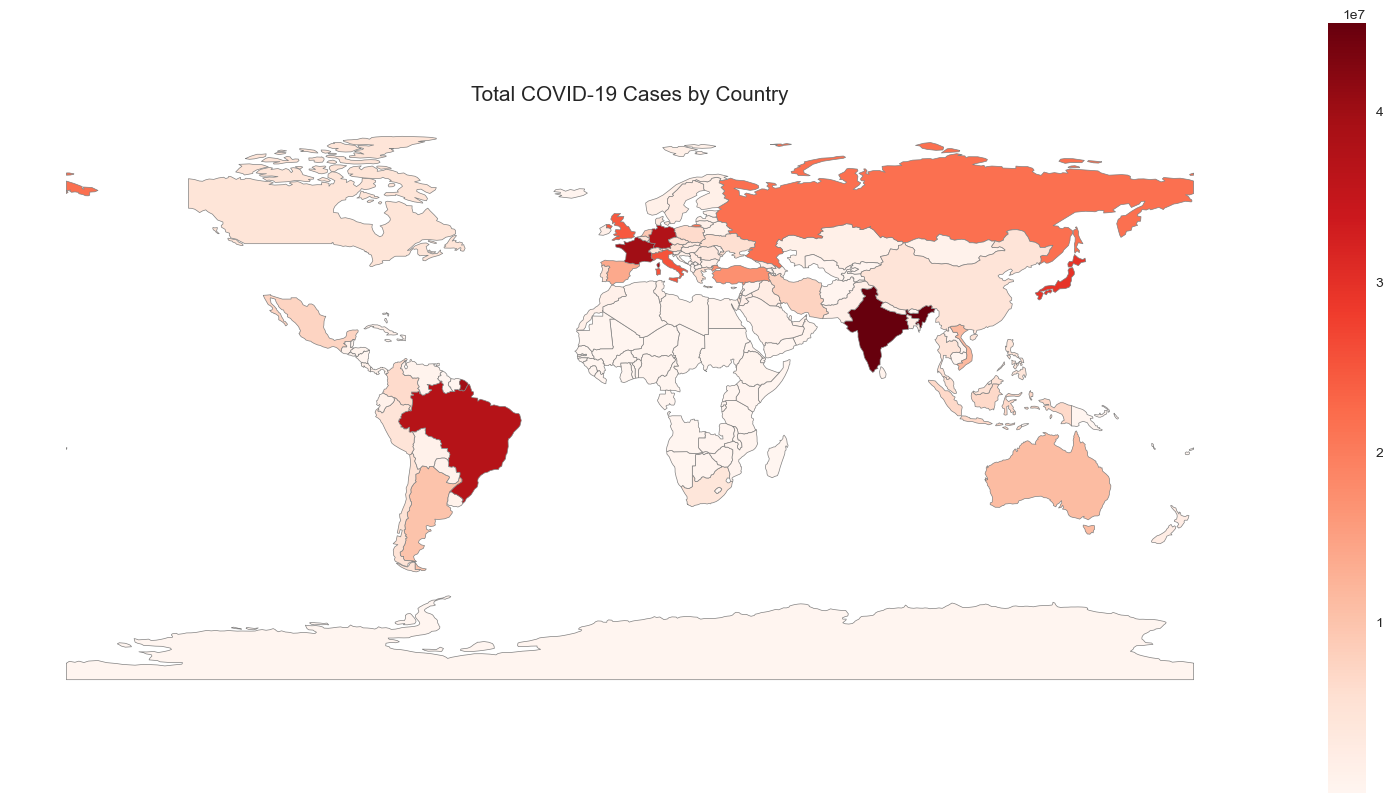

In [51]:
# Plot the choropleth map
fig, ax = plt.subplots(figsize=(20,10))
merged.plot(column='cases', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.5', legend=True)
ax.axis('off')
ax.set_title('Total COVID-19 Cases by Country', fontdict={'fontsize': '15', 'fontweight' : '3'})

plt.savefig("Total COVID-19 Cases by Country.png")
plt.show()